# IS424: Data Mining & Biz Analytics
## Project: Loan Prediction Based on Customer Behaviour
### Exploratory Data Analysis
---

# 1. Setting up the notebook

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

### Import data
The dataset was obtained from <a href="https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior">Kaggle</a>

In [2]:
data = pd.read_csv("loanprediction.csv", index_col = 0)
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Functions

In [3]:
def categorical_probability(col_name):
    """
    Calculates probability distribution of Default and No Default

    INPUTS:
        columns — DataFrame of a particular categorical variable
    
    OUTPUT:
        DataFrame with p_default, p_no_default for each sub-category, sorted in p_default descending order
    """
    # Calculate probability
    column_df = pd.crosstab(index=data[col_name], 
                               columns=data["risk_flag"],
                                margins=True)

    column_unique = data[col_name].unique()
    all_cols = np.append(column_unique, "col_total")
    column_df.index = all_cols
    column_df.columns = ["no_default","default", "row_total"]


    column_df['p_default'] = round(column_df['default'] / column_df['row_total'], 4)
    column_df['p_no_default'] = round(column_df['no_default'] / column_df['row_total'], 4)
    column_df_probability = pd.DataFrame( [column_df['p_default'], column_df['p_no_default']], columns=column_df.index ).T
    column_df_probability = column_df_probability.drop( labels=['p_no_default'], axis=1)
    column_df_probability.sort_values(by=['p_default'], ascending=False, inplace=True)
    
    # Display table
    table = column_df_probability[:15]
    cm = sns.color_palette("crest", as_cmap=True)
    styled_table = table.style.background_gradient(cmap=cm)
    display(styled_table)

# 2. Basic exploration

In [4]:
data.shape

(252000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [6]:
data.columns = ['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag']

numerical = data[ ["income", "age", "experience", "current_job_yrs", "current_house_yrs"] ]
categorical = data[ ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"] ]

In [7]:
data.isnull().sum()

income               0
age                  0
experience           0
marital_status       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

Some findings:
- There are 252,000 instances in the training dataset, and:
  - No missing values within the dataset
  - From the 12 columns, there are:
    - 6 numerical columns
    - 6 categorical columns

# 3. Exploring Numerical Columns

In [8]:
# check for skewness
data.skew()

/var/folders/h8/zsl5znnn6m71b_clc0wvwl440000gn/T/ipykernel_22751/2356063557.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


income               0.005958
age                 -0.005316
experience          -0.012779
current_job_yrs      0.273146
current_house_yrs    0.006786
risk_flag            2.295734
dtype: float64

In [9]:
data.describe()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


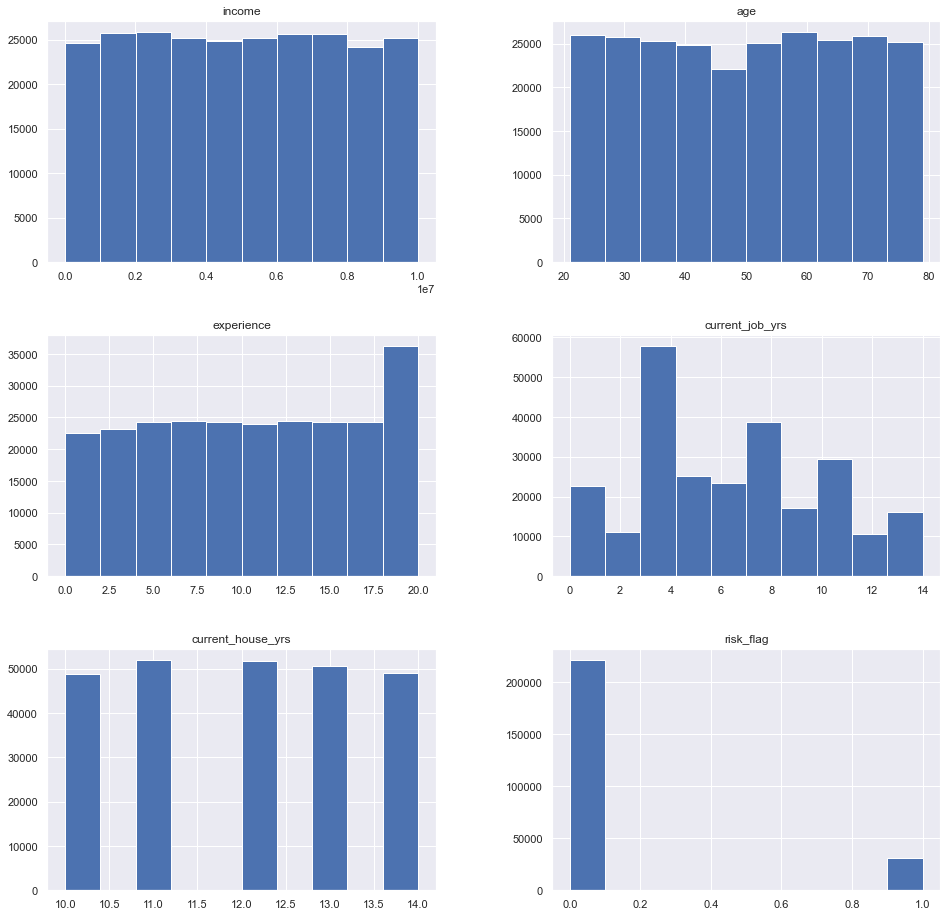

In [10]:
data.hist( figsize = (16, 16) )
plt.show()

### Taking a closer look

In [11]:
data["experience"].value_counts().sort_index()

0     11043
1     11575
2     11087
3     12069
4     11807
5     12441
6     13158
7     11232
8     11350
9     12936
10    12503
11    11449
12    12800
13    11713
14    12369
15    11993
16    12106
17    12131
18    12601
19    12287
20    11350
Name: experience, dtype: int64

In [12]:
data["current_job_yrs"].value_counts().sort_index()

0     11043
1     11575
2     11087
3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
12    10605
13     9099
14     6916
Name: current_job_yrs, dtype: int64

In [13]:
data["current_house_yrs"].value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: current_house_yrs, dtype: int64

In [14]:
data["risk_flag"].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

### Checking for collinearity

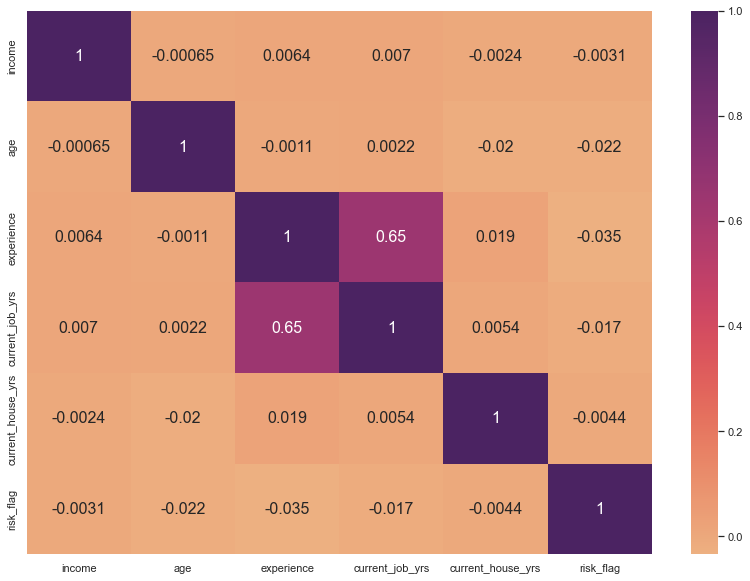

In [15]:
fig, ax = plt.subplots( figsize = (14,10) )

corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 16})

plt.savefig("correlation_matrix_heatmap.png", transparent=False, dpi=300, bbox_inches="tight")

plt.show()

<b>In summary, here are some of the overall findings from the exploring the numerical attributes <b>
- `Income` -> Data on a large scale, compared to the other numerical attributes
- Could be discretised
    - `CURRENT_HOUSE_YRS` 
    - `CURRENT_JOB_YRS` 
    - `Experience`
- `Risk_Flag` -> Extreme lopside distribution of the two classes
- `Age` -> could be be binned

- `Experience` and `CURRENT_JOB_YRS` -> have some correlation

## 3. Exploring the categorical columns

<AxesSubplot:xlabel='car_ownership', ylabel='count'>

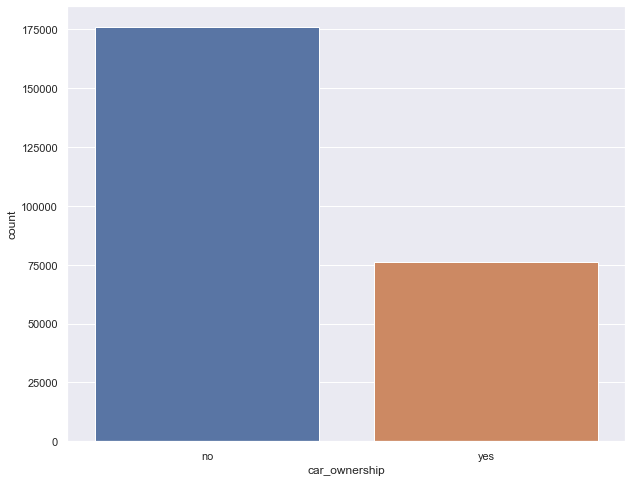

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x=data['car_ownership'], ax=ax)

<AxesSubplot:xlabel='house_ownership', ylabel='count'>

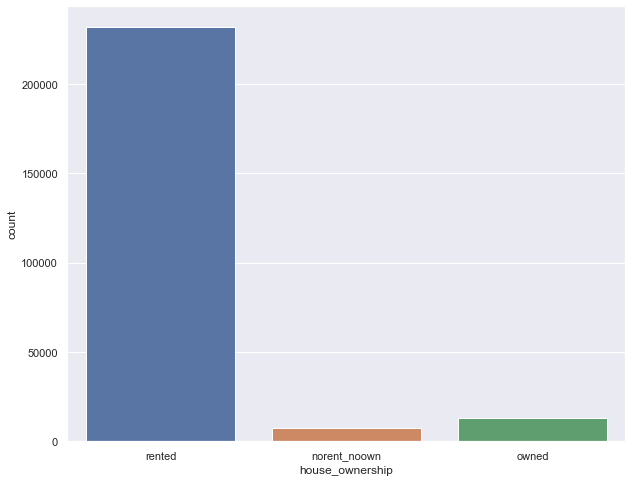

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x=data['house_ownership'], ax=ax)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

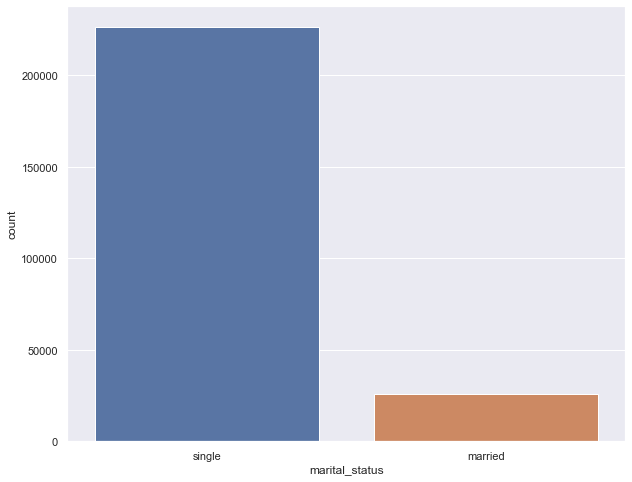

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x=data['marital_status'], ax=ax)

### Taking a closer look

In [19]:
data["marital_status"].value_counts()

single     226272
married     25728
Name: marital_status, dtype: int64

In [20]:
data["house_ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [21]:
data["car_ownership"].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

In [22]:
print( "Total categories in CITY:", len( data["city"].unique() ) )
print()
data["city"].value_counts() 

Total categories in CITY: 317



Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64

In [23]:
print( "Total categories in STATE:", len( data["state"].unique() ) )
print()
print( data["state"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64


In [24]:
print( "Total categories in Profession:", len( data["profession"].unique() ) )
print()
data["profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

### Probability of Default by State

In [25]:
categorical_probability('state')

,p_default
Himachal_Pradesh,0.215500
Chhattisgarh,0.168100
Puducherry,0.167100
Andhra_Pradesh,0.159000
Karnataka,0.154400
Tripura,0.142600
Mizoram,0.140800
Tamil_Nadu,0.133300
Bihar,0.133300
West_Bengal,0.133300


### Probability of Default by City

In [26]:
categorical_probability('city')

,p_default
Hindupur,0.326200
Ramgarh,0.272700
Bidhannagar,0.267000
Bhopal,0.252900
Jorhat,0.239600
Nizamabad,0.238900
Saharanpur,0.238700
Yamunanagar,0.238500
Hyderabad,0.231500
Bhimavaram,0.225700


### Probability of Default by Profession

In [27]:
categorical_probability('profession')

,p_default
Analyst,0.164100
Architect,0.153600
Civil_servant,0.152100
Surgeon,0.151500
Consultant,0.148400
Computer_operator,0.144300
Statistician,0.144300
Petroleum_Engineer,0.135800
Firefighter,0.135800
Financial_Analyst,0.135800


Some findings:
- `Married/Single`, `House_Ownership`, `Car_Ownership` -> can be discretised
- `Profession`, `STATE/CITY` -> High cardinality of categories, OneHotEncoding will have high dimensions
- Interesting patterns in `CITY` and `STATE` that show certain places with higher probabilities of default


### Bivariate boxplots against risk_flag

<AxesSubplot:xlabel='house_ownership', ylabel='count'>

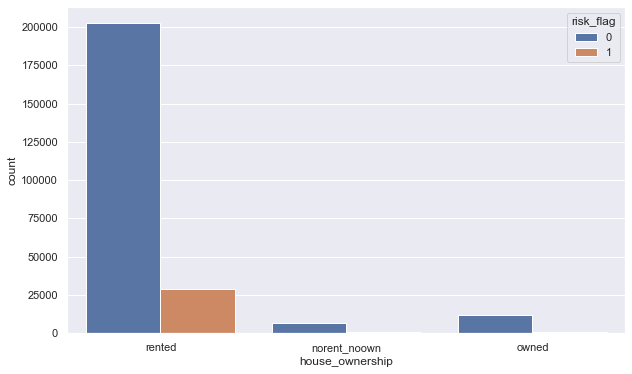

In [28]:
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots( figsize = (10,6) )
sns.countplot(x='house_ownership', hue='risk_flag', ax=ax, data=data)

<AxesSubplot:xlabel='car_ownership', ylabel='count'>

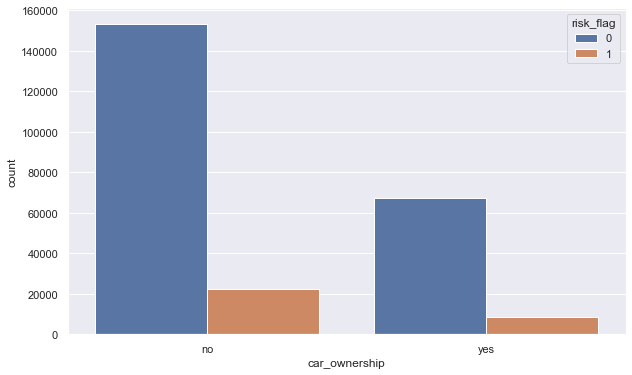

In [29]:
fig, ax = plt.subplots( figsize = (10,6) )
sns.countplot(x='car_ownership', hue='risk_flag', ax=ax, data=data)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

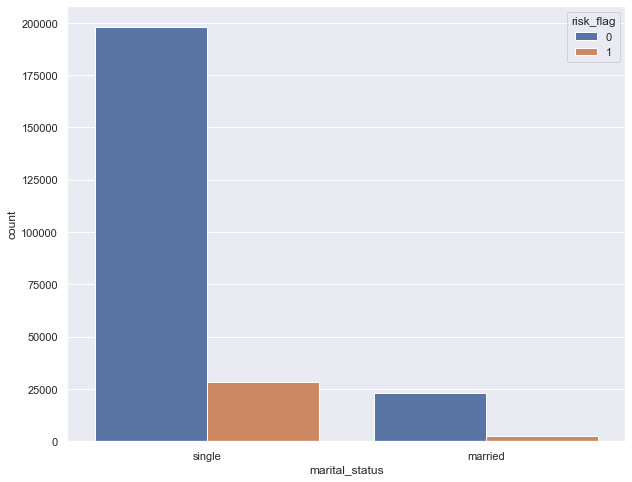

In [30]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.countplot( x='marital_status', hue='risk_flag', data=data )

## 4. Exploring across numerical and categorical attributes

In [31]:
data.dtypes

income                int64
age                   int64
experience            int64
marital_status       object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
risk_flag             int64
dtype: object

### Bivariate analysis

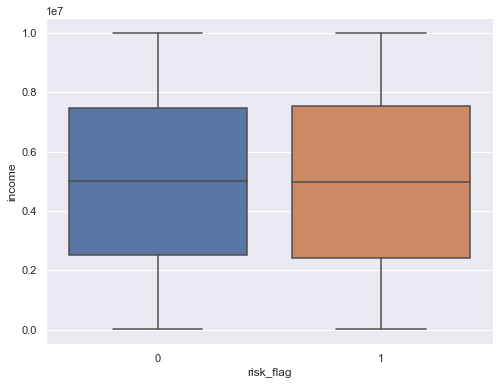

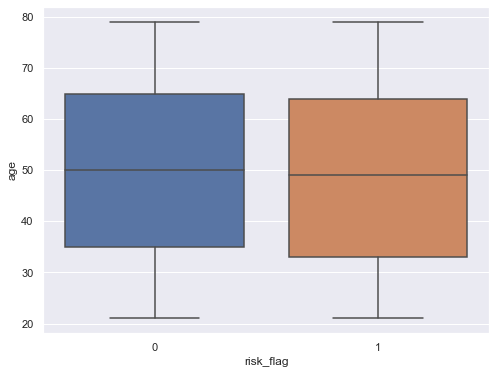

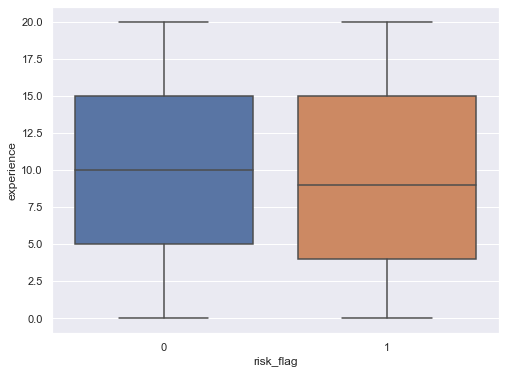

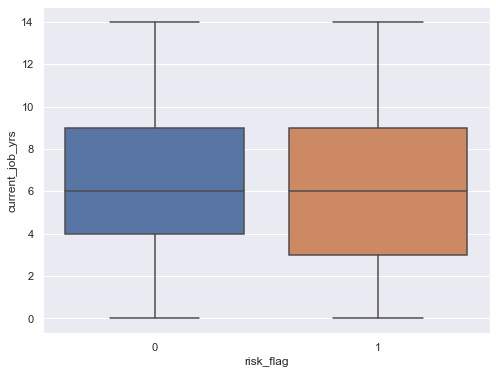

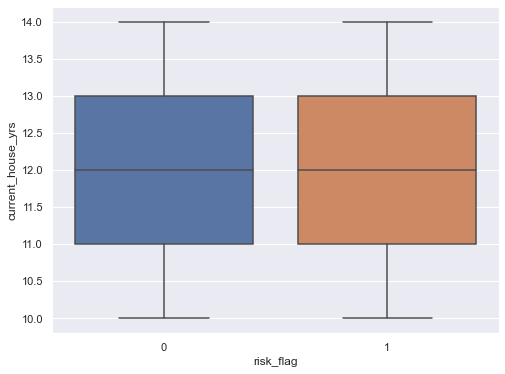

In [38]:
for numerical in ["income","age","experience","current_job_yrs","current_house_yrs"]:
    fig, ax = plt.subplots( figsize = (8,6) )
    sns.boxplot(x = "risk_flag", y = numerical, data = data)

From the plots, we can see some variables that may show some kind of pattern with `Risk_Flag`:
- `CURRENT_JOB_YRS`
- `EXPERIENCE`
- `AGE`

### Multivariate analysis

<AxesSubplot:xlabel='house_ownership', ylabel='current_job_yrs'>

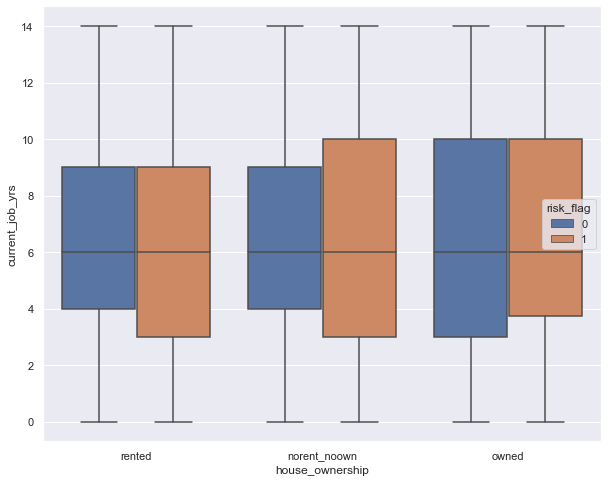

In [33]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "house_ownership", y = "current_job_yrs", hue='risk_flag', data = data)

<AxesSubplot:xlabel='car_ownership', ylabel='current_job_yrs'>

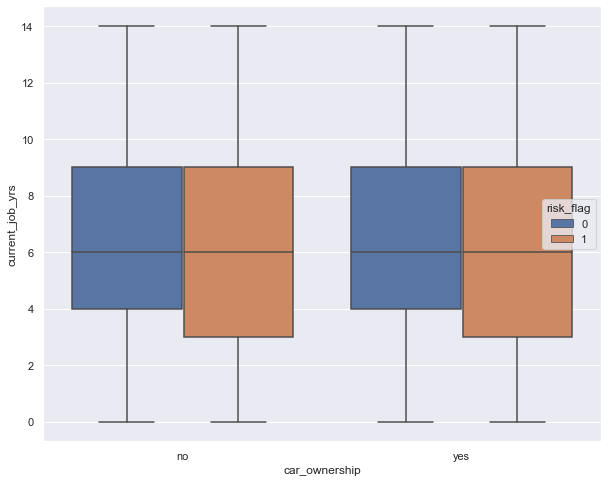

In [34]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "car_ownership", y = "current_job_yrs", hue='risk_flag', data = data)

<AxesSubplot:xlabel='marital_status', ylabel='current_job_yrs'>

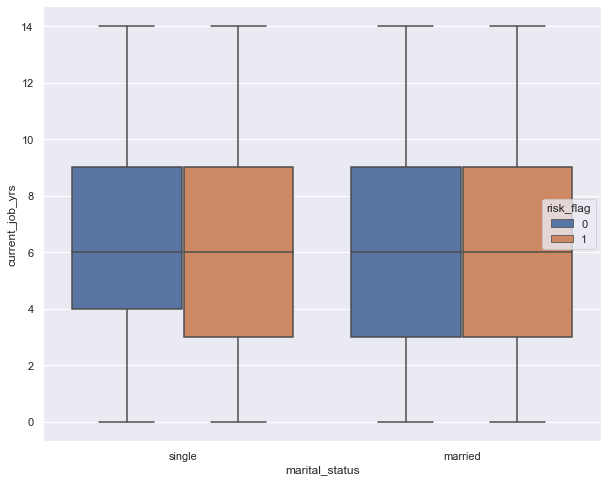

In [35]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "marital_status", y = "current_job_yrs", hue='risk_flag', data = data)

<AxesSubplot:xlabel='marital_status', ylabel='age'>

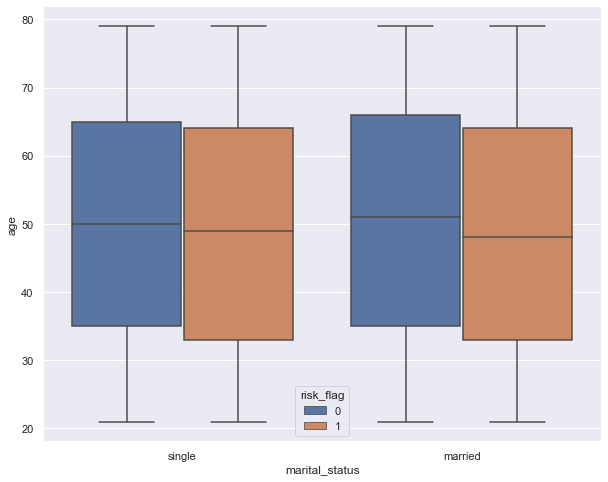

In [36]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "marital_status", y = "age", hue = "risk_flag", data = data)

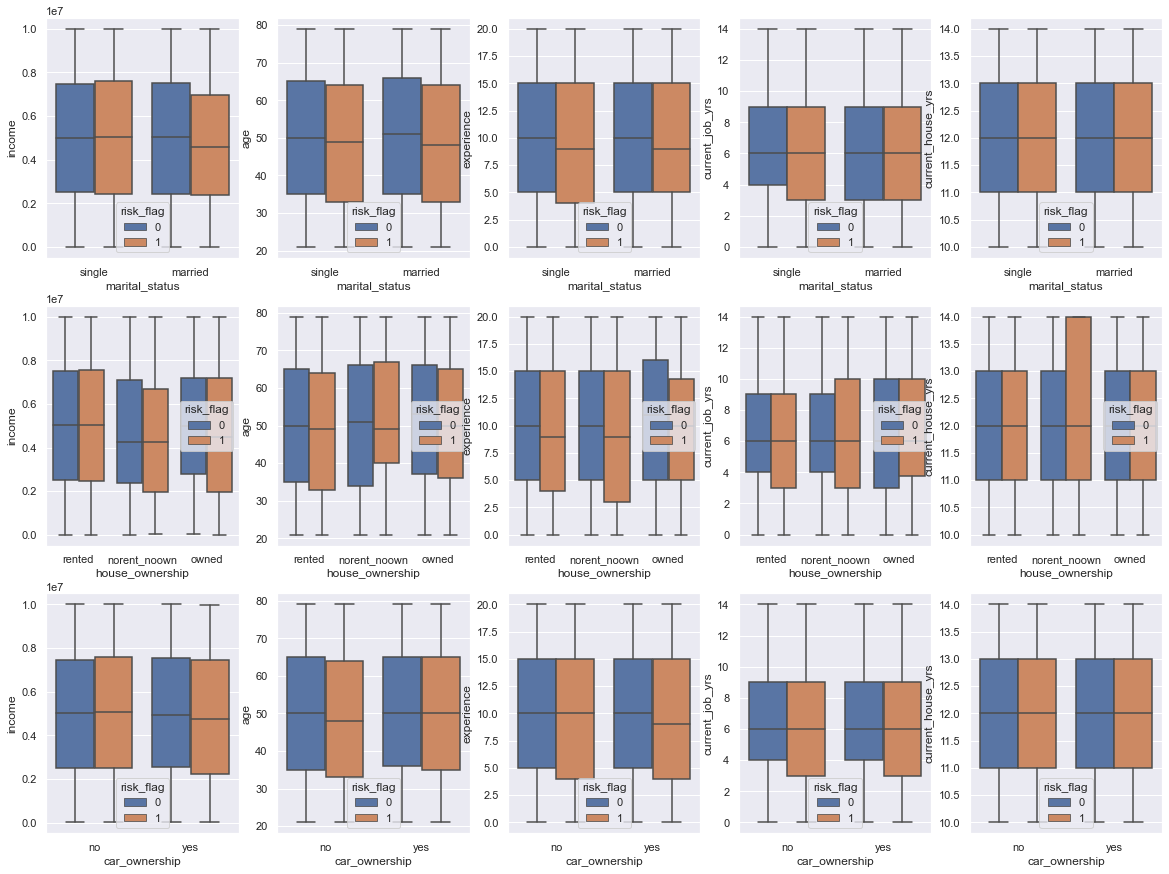

<Figure size 3600x3600 with 0 Axes>

In [37]:
numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"]

fig, ax = plt.subplots(3, 5, figsize=(20, 15))

plt.figure(figsize=(50, 50))
for c in range( len(categorical) - 3 ):
    for n in range( len(numerical) ):
        cat = categorical[c]
        num = numerical[n]
        sns.boxplot( x=cat, y=num, hue='risk_flag', data = data, ax=ax[c,n])
    
        
plt.show()